In [1]:
import matplotlib.pyplot as plt
import numpy as np

from classifiers import *

In [2]:
# Loading data
data = np.load("data.npz")

# Getting train, val and test data and labels, and the mean_image
data_train = data["data_train"]
labels_train = data["labels_train"]
data_val = data["data_val"]
labels_val = data["labels_val"]
data_test = data["data_test"]
labels_test = data["labels_test"]
mean_image = data["mean_image"]

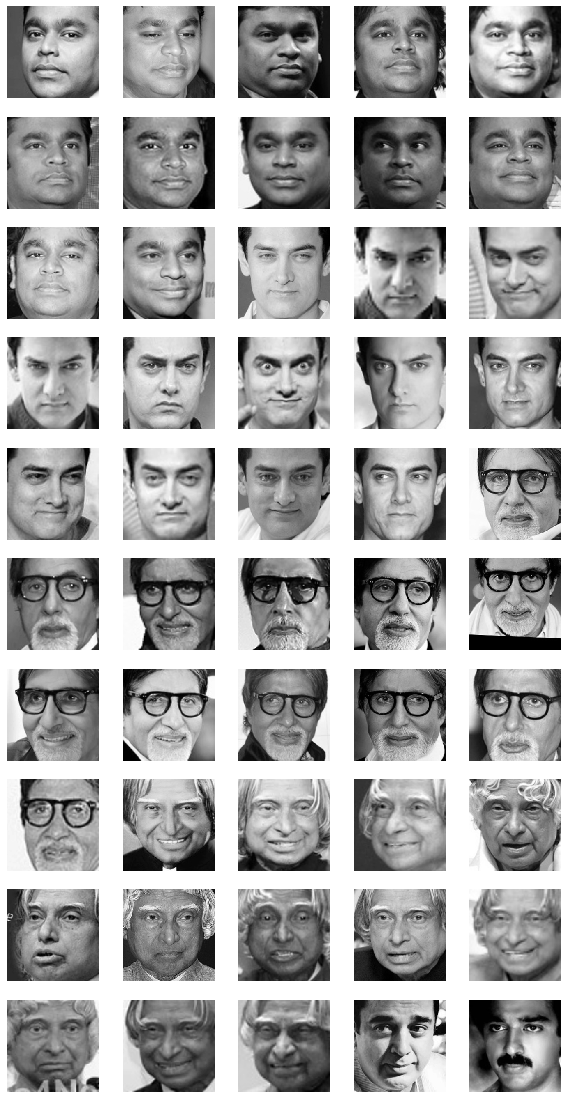

In [3]:
# Number of images to be plotted
N = 50

plt.figure(figsize=(10, 2*(N+5)//5))

for i in range(N):
    
    # Make a subplot
    plt.subplot((N+5)//5, 5, i+1)
    
    # Plot the image, after reshaping it to (224, 224)
    plt.imshow(np.reshape(data_train[i] + mean_image, (224, 224)), cmap='gray')
    
    # Turn off axis lines
    plt.axis("off")

plt.show()

In [5]:
# Assigning data_train to "A"
A = data_train

In [6]:
def find_eigenvalues_and_eigenvectors_simply(A):
    # Your code here
    L = 1 / len(A.T) * np.dot(A, A.T)
    e, u = np.linalg.eig(L)
    w = e
    v = np.dot(A.T, u)
    return w, v

In [7]:
eigenvalues, eigenvectors = find_eigenvalues_and_eigenvectors_simply(data_train)

In [8]:
# REORDER

# Find the required order of indices to make decreasing order of eigenvalue
sort_index = np.argsort(eigenvalues)[::-1]

# Use the calculated order of indices to reorder eigenvalues and eigenvectors
eigenvalues = eigenvalues[sort_index]
eigenvectors = eigenvectors[:, sort_index]

In [9]:
# NORMALIZE
eigenvectors = eigenvectors / np.linalg.norm(eigenvectors, axis=0)

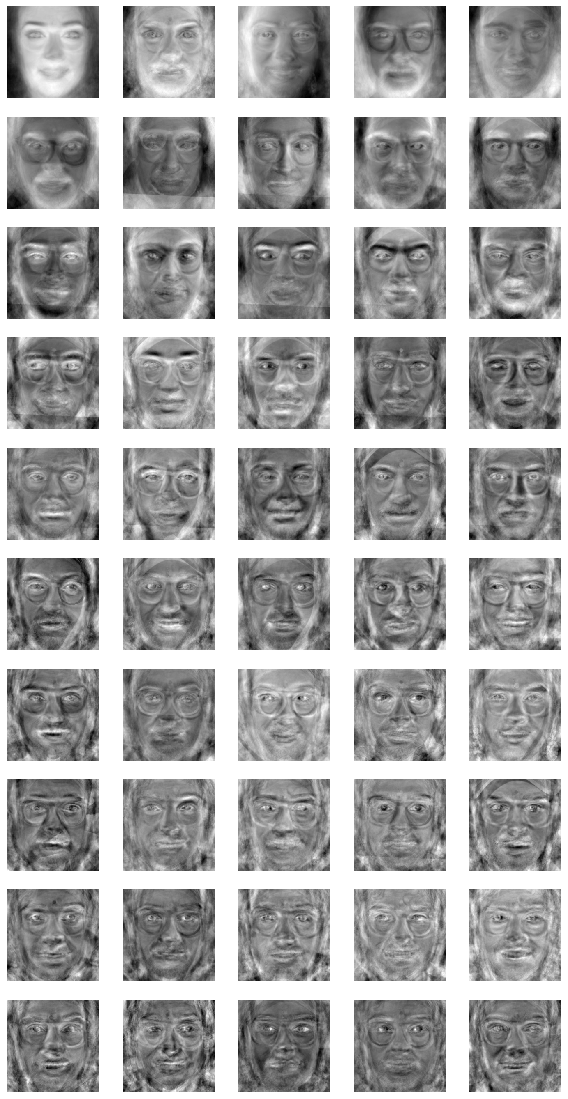

In [10]:
# Number of eigenfaces to be plotted
N = 50

plt.figure(figsize=(10, 2*(N+5)//5))

for i in range(N):
    
    # Make a subplot
    plt.subplot((N + 5)//5, 5, i+1)
    
    # Plot the eigenface, after reshaping it to (224, 224)
    # Remember eigenfaces are **columns** in the matrix
    plt.imshow(np.reshape(eigenvectors[:, i], (224, 224)), cmap='gray')
    
    # Turn off axis lines
    plt.axis("off")

plt.show()

In [11]:
eigenvectors.shape

(50176, 120)

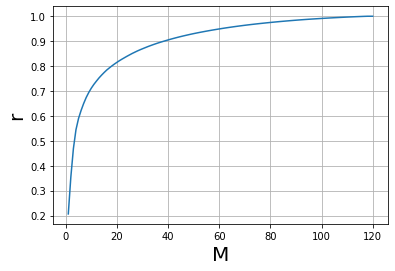

In [12]:
# Plot r vs M

# Values of M to consider: 1, 2,..., n
M = np.array(range(1, len(data_train) + 1))

# Calculate r for all values of M
r = np.cumsum(eigenvalues)/np.sum(eigenvalues)

# Plot r vs M
plt.plot(M, r)
plt.xlabel("M", fontsize=20)
plt.ylabel("r", fontsize=20)
plt.grid("on")
plt.show()

In [13]:
N = 20

In [14]:
pca_vectors = eigenvectors[:, :N]

In [15]:
pca_features_train = np.dot(data_train, pca_vectors)
pca_features_val = np.dot(data_val, pca_vectors)
pca_features_test = np.dot(data_test, pca_vectors)

In [16]:
print(pca_features_train.shape, pca_features_val.shape, pca_features_test.shape)

(120, 20) (40, 20) (40, 20)


In [17]:
# Deep features
deep_features = np.load("vgg_face_indian_dataset/vgg_face_deep_features.npz")
deep_features_train = deep_features["train"]
deep_features_val = deep_features["val"]
deep_features_test = deep_features["test"]

In [18]:
print(deep_features_train.shape, deep_features_val.shape, deep_features_test.shape)

(120, 2622) (40, 2622) (40, 2622)


In [19]:
NB_pca_test_acc = predict_and_find_accuracy("NB", pca_features_train, labels_train, pca_features_test, labels_test)
print(NB_pca_test_acc)

0.725


In [20]:
NB_deep_test_acc = predict_and_find_accuracy("NB", deep_features_train, labels_train, deep_features_test, labels_test)
print(NB_deep_test_acc)

0.15


In [21]:
values_of_k = [1, 3, 5, 7, 9, 11]

In [22]:
pca_k_acc = []

for k in values_of_k:
    pca_k_acc.append(predict_and_find_accuracy("kNN", pca_features_train, labels_train, pca_features_val, labels_val, k))
    
best_pca_k = values_of_k[np.argmax(pca_k_acc)]
print(best_pca_k)

kNN_pca_test_acc = predict_and_find_accuracy("kNN",  pca_features_train, labels_train, pca_features_test, labels_test, best_pca_k)
print(kNN_pca_test_acc)

1
0.525


In [23]:
deep_k_acc = []

for k in values_of_k:
    deep_k_acc.append(predict_and_find_accuracy("kNN", deep_features_train, labels_train, deep_features_val, labels_val, k))
    
best_deep_k = values_of_k[np.argmax(deep_k_acc)]
print(best_deep_k)

kNN_deep_test_acc = predict_and_find_accuracy("kNN",  deep_features_train, labels_train, deep_features_test, labels_test, best_deep_k)
print(kNN_deep_test_acc)

1
0.375


In [24]:
linear_pca_test_acc = predict_and_find_accuracy("linear",  pca_features_train, labels_train, pca_features_test, labels_test)
print(linear_pca_test_acc)

0.6


In [25]:
linear_deep_test_acc = predict_and_find_accuracy("linear",  deep_features_train, labels_train, deep_features_test, labels_test)
print(linear_deep_test_acc)

0.475


In [26]:
# Finding training accuracies
NB_pca_train_acc = predict_and_find_accuracy("NB", pca_features_train, labels_train, pca_features_train, labels_train)
NB_deep_train_acc = predict_and_find_accuracy("NB", deep_features_train, labels_train, deep_features_train, labels_train)
kNN_pca_train_acc = predict_and_find_accuracy("kNN", pca_features_train, labels_train, pca_features_train, labels_train, best_pca_k)
kNN_deep_train_acc = predict_and_find_accuracy("kNN", deep_features_train, labels_train, deep_features_train, labels_train, best_deep_k)
linear_pca_train_acc = predict_and_find_accuracy("linear", pca_features_train, labels_train, pca_features_train, labels_train)
linear_deep_train_acc = predict_and_find_accuracy("linear", deep_features_train, labels_train, deep_features_train, labels_train)

# Finding validation accuracies
NB_pca_val_acc = predict_and_find_accuracy("NB", pca_features_train, labels_train, pca_features_val, labels_val)
NB_deep_val_acc = predict_and_find_accuracy("NB", deep_features_train, labels_train, deep_features_val, labels_val)
kNN_pca_val_acc = predict_and_find_accuracy("kNN", pca_features_train, labels_train, pca_features_val, labels_val, best_pca_k)
kNN_deep_val_acc = predict_and_find_accuracy("kNN", deep_features_train, labels_train, deep_features_val, labels_val, best_deep_k)
linear_pca_val_acc = predict_and_find_accuracy("linear", pca_features_train, labels_train, pca_features_val, labels_val)
linear_deep_val_acc = predict_and_find_accuracy("linear", deep_features_train, labels_train, deep_features_val, labels_val)

In [27]:
print("      Model                      Train acc      Val acc     Test acc ")
print("---------------------------------------------------------------------")
print("Naive Bayes with PCA features  :   ", "{0:.03f}".format(NB_pca_train_acc),  "      ", "{0:.03f}".format(NB_pca_val_acc), "      ", "{0:.03f}".format(NB_pca_test_acc))
print("Naive Bayes with Deep features :   ", "{0:.03f}".format(NB_deep_train_acc),  "      ", "{0:.03f}".format(NB_deep_val_acc), "      ", "{0:.03f}".format(NB_deep_test_acc))
print("kNN with PCA features          :   ", "{0:.03f}".format(kNN_pca_train_acc),  "      ", "{0:.03f}".format(kNN_pca_val_acc), "      ", "{0:.03f}".format(kNN_pca_test_acc))
print("kNN with Deep features         :   ", "{0:.03f}".format(kNN_deep_train_acc),  "      ", "{0:.03f}".format(kNN_deep_val_acc), "      ", "{0:.03f}".format(kNN_deep_test_acc))
print("Linear with PCA features       :   ", "{0:.03f}".format(linear_pca_train_acc),  "      ", "{0:.03f}".format(linear_pca_val_acc), "      ", "{0:.03f}".format(linear_pca_test_acc))
print("Linear with Deep features      :   ", "{0:.03f}".format(linear_deep_train_acc),  "      ", "{0:.03f}".format(linear_deep_val_acc), "      ", "{0:.03f}".format(linear_deep_test_acc))

      Model                      Train acc      Val acc     Test acc 
---------------------------------------------------------------------
Naive Bayes with PCA features  :    0.958        0.600        0.725
Naive Bayes with Deep features :    0.142        0.175        0.150
kNN with PCA features          :    1.000        0.575        0.525
kNN with Deep features         :    1.000        0.475        0.375
Linear with PCA features       :    1.000        0.550        0.600
Linear with Deep features      :    0.700        0.550        0.475
